In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.DataFrame({
    'Age': np.random.randint(18, 65, 500),
    'Purchased': np.random.randint(0, 2, 500)
})
df

,Age,Purchased
0,63,0
1,58,0
2,39,1
3,41,0
4,39,1
...,...,...
495,36,1
496,58,0
497,61,1
498,62,1


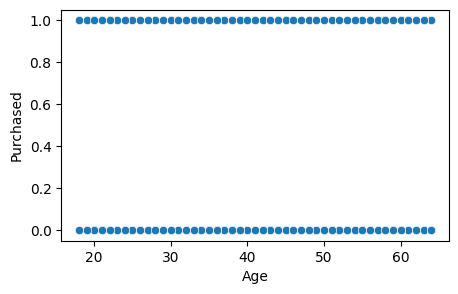

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Age', y='Purchased')
plt.show()

In [ ]:
x = df[['Age']]
y = df['Purchased']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

54.0

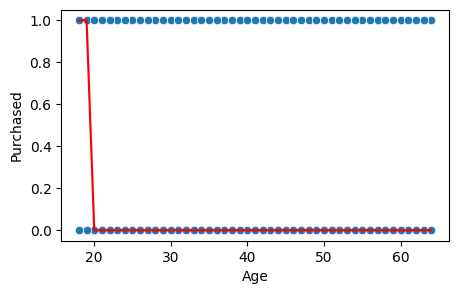

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Age', y='Purchased')
# Select the 'Age' column from the DataFrame x to make it 1-dimensional
sns.lineplot(x=x['Age'], y=lr.predict(x), color='red')
plt.show()
print(lr.predict([[24]]))

In [ ]:
# Seed for reproducibility (optional)
np.random.seed(42)

df = pd.DataFrame({
    'cgpa': np.round(np.random.uniform(0, 10, 500), 2),
    'score': np.random.randint(0, 101, 500)
})

df['placed'] = ((df['cgpa'] >= 7) & (df['score'] >= 80)).astype(int)
df.head(20)

,cgpa,score,placed
0,3.75,62,0
1,9.51,16,0
2,7.32,72,0
3,5.99,32,0
4,1.56,83,0
5,1.56,76,0
6,0.58,91,0
7,8.66,28,0
8,6.01,12,0
9,7.08,45,0


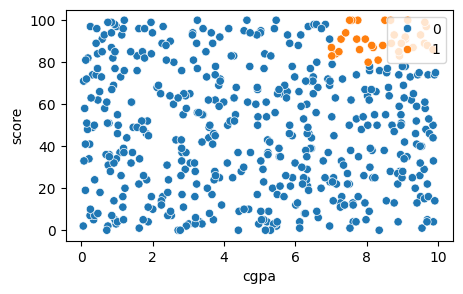

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='cgpa', y='score', hue='placed')
plt.legend(loc=1)
plt.show()

In [ ]:
x = df[['cgpa', 'score']]
y = df['placed']

In [ ]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=29)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

98.25

In [ ]:
lr.predict([[8.32,81]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


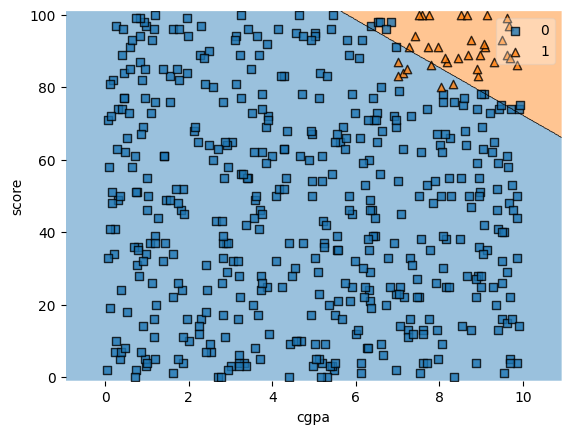

In [ ]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.xlabel('cgpa')
plt.ylabel('score')
plt.show()